#### 数据预处理

> 导入pandas包与数据加载

In [66]:
import pandas as pd

df = pd.read_csv('titanic/train.csv')

> 初略统计

In [67]:
df.head(5) # 显示前5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.tail(5) #显示后5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [69]:
df.columns # 查看列名（特征）

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
df.info() # 查看各个段的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df.shape  # 查看数据集行列分布（几行几列）

(891, 12)

In [72]:

df.describe() # 查看数据的大体情况

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> 缺失值

In [74]:
# 查找与统计

# 统计缺失值数量
total = df.isnull().sum().sort_values(ascending=False)
print(total)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


In [75]:
# 处理（填充）

# 使用中位数填充
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [76]:
# 使用平均数填充
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [20]:
# 使用众数填充
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [77]:
# 查看以下填充后的结果，这里age用的平均数填充
print(df.isnull().sum().sort_values(ascending=False))

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Name             0
Pclass           0
Sex              0
Age              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


In [78]:
# 使用拉格朗日法填充
from scipy.interpolate import lagrange

# 自定义插值函数
# s 为列向量，n 为插值位置，k为取前后数据个数，默认为5

def ployinterp_column(s, n, k):
    y = s.reindex(list(range(n - k, n)) + list(range(n + 1, n + 1 + k))) #取前后k个数
    y = y[y.notnull()] #删除空值

    return lagrange(y.index, list(y))(n) # 插值并返回结果

# 逐个元素判断是否需要插值

for i in range(len(df['Age'])):
    if(df['Age'].isnull())[i]:
        df['Age'][i] = ployinterp_column(df['Age'], j)

print(df['Age'].count) # 统计Age列中非空元素个数

<bound method Series.count of 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64>


In [79]:
# 删除空列值
df = df.drop(['Cabin'], axis=1)

# 删除空列行
df = df.drop(df[df['Embarked'].isnull()].index)

# 查看删除后的结果
print(df_new.isnull().sum().sort_values(ascending=False))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [81]:
# 查找异常值
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


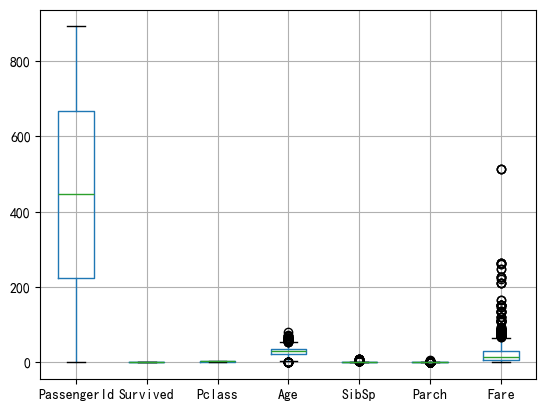

In [82]:
# 查找异常值（箱型图方法），建议用spyder观测数据结构
import matplotlib.pylab as plt

plt.figure()
p = df.boxplot(return_type='dict')  # 绘制箱型图
x = p['fliers'][6].get_xdata() #fiers 为异常值标签
y = p['fliers'][6].get_ydata() #x为x轴数据，y为y轴数据
plt.show()

In [84]:
# 将异常值替换为平均值
df.replace([512.32900], df['Fare'].mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [85]:
# 查找重复值
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 889, dtype: bool

In [86]:
# 删除重复行（保留0项）
df.drop_duplicates(keep=False) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [33]:
df.duplicated().sum()

np.int64(0)

In [87]:
# 统计乘客死亡和存活人数
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [88]:
# 统计乘客中男女性别人数
df['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [89]:
# 统计男女获救人数
survive = df['Sex'][df['Survived']==1].value_counts()
print(survive)

Sex
female    231
male      109
Name: count, dtype: int64


In [92]:
# 使用corr()函数判断属性间相关性
df['Pclass'].corr(df['Survived'])

np.float64(-0.33554885935682494)

<Axes: title={'center': 'Fare'}, xlabel='[Pclass]'>

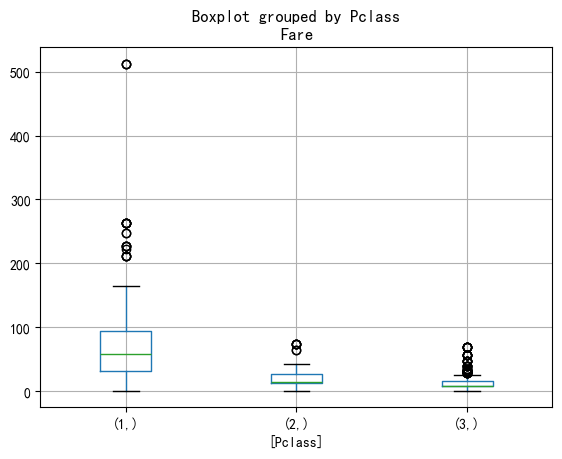

In [94]:
# 绘制乘客票价与舱位等级箱型图Boxplot
df.boxplot(['Fare'], ['Pclass'])

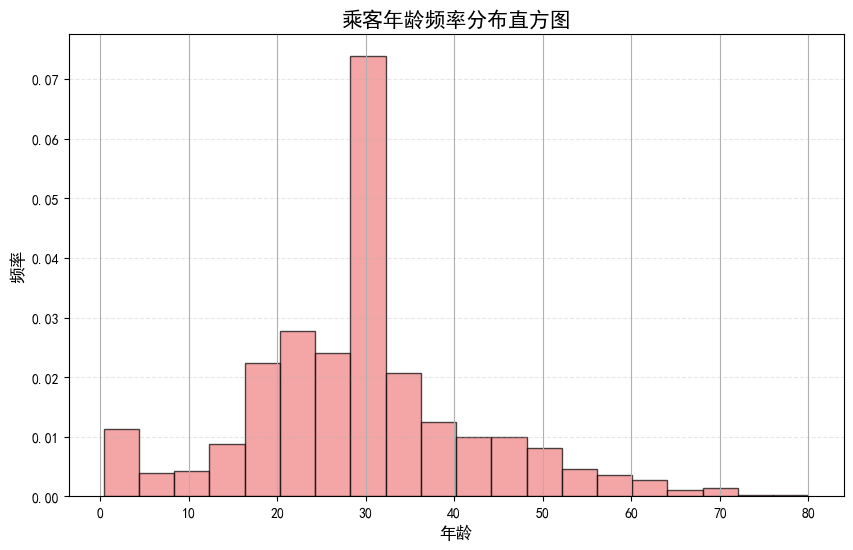

In [95]:
plt.rcParams["font.family"] = ["SimHei"]

# 提取年龄数据
age_data = df['Age'].dropna()  # 若Age列有缺失值，先删除缺失行

plt.figure(figsize=(10, 6))

# 绘制频率直方图
age_data.hist(bins=20, density=True, color='lightcoral', alpha=0.7, edgecolor='black')

plt.title('乘客年龄频率分布直方图', fontsize=15)
plt.xlabel('年龄', fontsize=12)
plt.ylabel('频率', fontsize=12)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [99]:
Age=df['Age']
n1=(Age-Age.min())/(Age.max()-Age.min())#最小-最大规范化
n2=(Age-Age.mean())/Age.std() #零-均值规范化
n3=Age/10**np.ceil(np.log10(Age.abs().max()))#小数定标规范化
print(n1,n2,n3)

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.367921
889    0.321438
890    0.396833
Name: Age, Length: 889, dtype: float64 0     -0.590163
1      0.643609
2     -0.281720
3      0.412277
4      0.412277
         ...   
886   -0.204609
887   -0.821495
888    0.003522
889   -0.281720
890    0.180944
Name: Age, Length: 889, dtype: float64 0      0.220000
1      0.380000
2      0.260000
3      0.350000
4      0.350000
         ...   
886    0.270000
887    0.190000
888    0.296991
889    0.260000
890    0.320000
Name: Age, Length: 889, dtype: float64


In [102]:
#保存预处理后数据集
df.to_json('titanic_after_preprocessing.json')#保存到json文件
df.to_csv('titanic_after_preprocessing.csv')#保存到csv文件
df.to_excel('titanic_after_preprocessing.xlsx')#保存到excel文件